<a href="https://colab.research.google.com/github/Abhinavband/IPL_DataAnalysis/blob/main/IPL_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load IPL Dataset
df = pd.read_csv('/content/auction.csv')
#print(df.head())



              PLAYER NATIONALITY         TYPE                 TEAM  PRICE PAID
0     Daryl Mitchell    Overseas  All-Rounder  Chennai Super Kings   140000000
1       Sameer Rizvi      Indian       Batter  Chennai Super Kings    84000000
2     Shardul Thakur      Indian  All-Rounder  Chennai Super Kings    40000000
3  Mustafizur Rahman    Overseas       Bowler  Chennai Super Kings    20000000
4    Rachin Ravindra    Overseas  All-Rounder  Chennai Super Kings    18000000


In [8]:
# Analysis 1: Top 5 Players by Price Paid

top_5_players = df.nlargest(5, 'PRICE PAID')
print(top_5_players)

            PLAYER NATIONALITY         TYPE                         TEAM  \
23  Mitchell Starc    Overseas       Bowler        Kolkata Knight Riders   
66     Pat Cummins    Overseas  All-Rounder          Sunrisers Hyderabad   
0   Daryl Mitchell    Overseas  All-Rounder          Chennai Super Kings   
47   Harshal Patel      Indian  All-Rounder                 Punjab Kings   
60  Alzarri Joseph    Overseas       Bowler  Royal Challengers Bengaluru   

    PRICE PAID  
23   247500000  
66   205000000  
0    140000000  
47   117500000  
60   115000000  


In [9]:
# Analysis 2: Top Indian and Overseas Players by Price Paid
top_indian = df[df['NATIONALITY'] == 'Indian'].nlargest(5, 'PRICE PAID')
top_overseas = df[df['NATIONALITY'] == 'Overseas'].nlargest(5, 'PRICE PAID')
print(top_indian)
print(top_overseas)

            PLAYER NATIONALITY           TYPE                  TEAM  \
47   Harshal Patel      Indian    All-Rounder          Punjab Kings   
1     Sameer Rizvi      Indian         Batter   Chennai Super Kings   
16   Shahrukh Khan      Indian    All-Rounder        Gujarat Titans   
6   Kumar Kushagra      Indian  Wicket-Keeper        Delhi Capitals   
33     Shivam Mavi      Indian         Bowler  Lucknow Super Giants   

    PRICE PAID  
47   117500000  
1     84000000  
16    74000000  
6     72000000  
33    64000000  
             PLAYER NATIONALITY         TYPE                         TEAM  \
23   Mitchell Starc    Overseas       Bowler        Kolkata Knight Riders   
66      Pat Cummins    Overseas  All-Rounder          Sunrisers Hyderabad   
0    Daryl Mitchell    Overseas  All-Rounder          Chennai Super Kings   
60   Alzarri Joseph    Overseas       Bowler  Royal Challengers Bengaluru   
15  Spencer Johnson    Overseas       Bowler               Gujarat Titans   

    PRIC

In [10]:
# Analysis 3: Distribution of Players by Nationality
nationality_count = df['NATIONALITY'].value_counts()
print(nationality_count)

NATIONALITY
Indian      42
Overseas    30
Name: count, dtype: int64


In [13]:
# Analysis 4: Average Price Paid for Indian vs. Overseas Players
avg_price_nationality = df.groupby('NATIONALITY')['PRICE PAID'].mean()
print(avg_price_nationality)


NATIONALITY
Indian      1.891667e+07
Overseas    5.033333e+07
Name: PRICE PAID, dtype: float64


In [14]:
# Analysis 5: Distribution of Player Types
type_count = df['TYPE'].value_counts()
print(type_count)

TYPE
Bowler           26
All-Rounder      25
Batter           13
Wicket-Keeper     8
Name: count, dtype: int64


In [15]:
# Analysis 6: Price Distribution Based on Player Type
price_by_type = df.groupby('TYPE')['PRICE PAID'].mean()
print(price_by_type)

TYPE
All-Rounder      3.154000e+07
Batter           3.400000e+07
Bowler           3.617308e+07
Wicket-Keeper    1.668750e+07
Name: PRICE PAID, dtype: float64


In [17]:
# Analysis 7: Percentage of Total Price Paid by Each Player
df['PERCENTAGE OF TOTAL'] = (df['PRICE PAID'] / df['PRICE PAID'].sum()) * 100
print(df[['PLAYER', 'PERCENTAGE OF TOTAL']])

                    PLAYER  PERCENTAGE OF TOTAL
0           Daryl Mitchell             6.075071
1             Sameer Rizvi             3.645042
2           Shardul Thakur             1.735734
3        Mustafizur Rahman             0.867867
4          Rachin Ravindra             0.781080
..                     ...                  ...
67             Travis Head             2.950749
68          Jaydev Unadkat             0.694294
69       Wanindu Hasaranga             0.650900
70  Jhathavedh Subramanyan             0.086787
71             Akash Singh             0.086787

[72 rows x 2 columns]


In [19]:
# Analysis 8: Total Price Paid by Team
total_price_paid = df['PRICE PAID'].sum()
print(total_price_paid)

2304500000


In [20]:
# Analysis 9: Percentage of Total Budget Allocated for Each Player
df['PERCENTAGE OF BUDGET'] = (df['PRICE PAID'] / total_price_paid) * 100
print(df[['PLAYER', 'PERCENTAGE OF BUDGET']])

                    PLAYER  PERCENTAGE OF BUDGET
0           Daryl Mitchell              6.075071
1             Sameer Rizvi              3.645042
2           Shardul Thakur              1.735734
3        Mustafizur Rahman              0.867867
4          Rachin Ravindra              0.781080
..                     ...                   ...
67             Travis Head              2.950749
68          Jaydev Unadkat              0.694294
69       Wanindu Hasaranga              0.650900
70  Jhathavedh Subramanyan              0.086787
71             Akash Singh              0.086787

[72 rows x 2 columns]


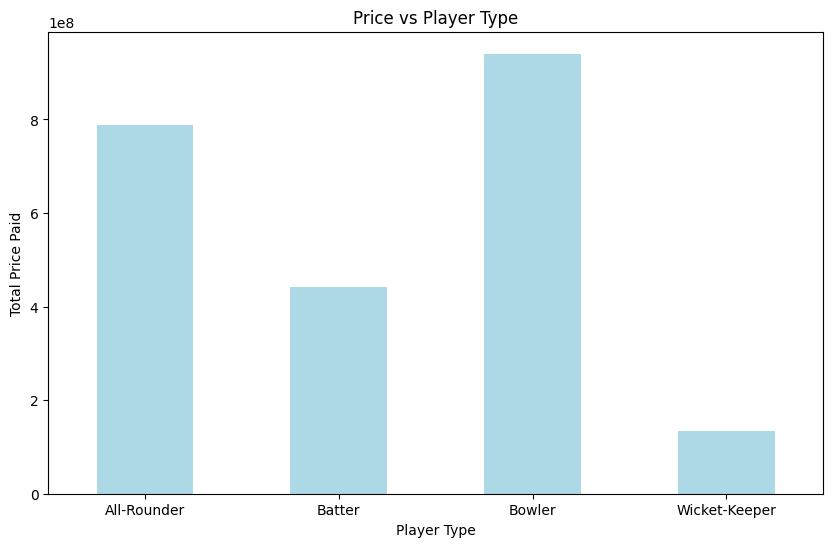

In [22]:
# Group by Player Type and calculate the sum of price paid for each type
price_by_type = df.groupby('TYPE')['PRICE PAID'].sum()

# Plot the bar graph
plt.figure(figsize=(10, 6))
price_by_type.plot(kind='bar', color='lightblue')
plt.title('Price vs Player Type')
plt.xlabel('Player Type')
plt.ylabel('Total Price Paid')
plt.xticks(rotation=0)
plt.show()


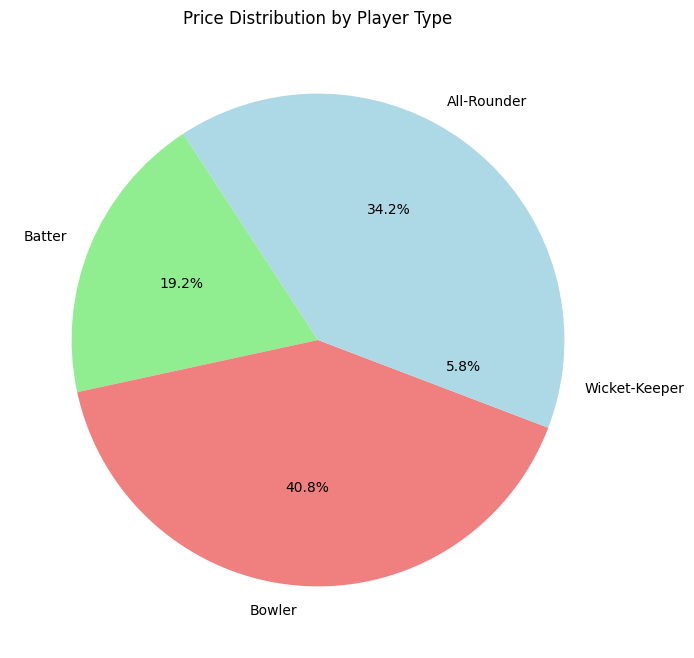

In [23]:
# Group by Player Type and calculate the sum of price paid for each type
price_by_type = df.groupby('TYPE')['PRICE PAID'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(price_by_type, labels=price_by_type.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Price Distribution by Player Type')
plt.show()


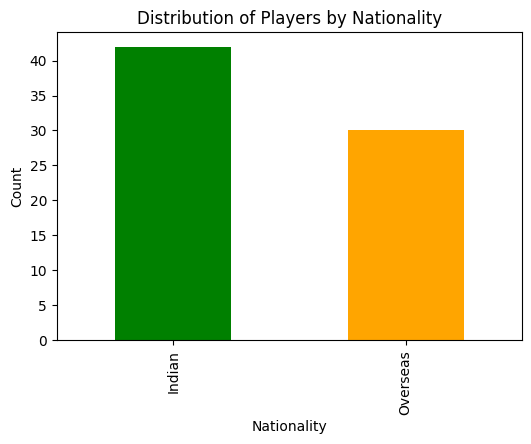

In [24]:
# Analysis 3: Distribution of Players by Nationality
plt.figure(figsize=(6, 4))
nationality_count.plot(kind='bar', color=['green', 'orange'])
plt.title('Distribution of Players by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.show()

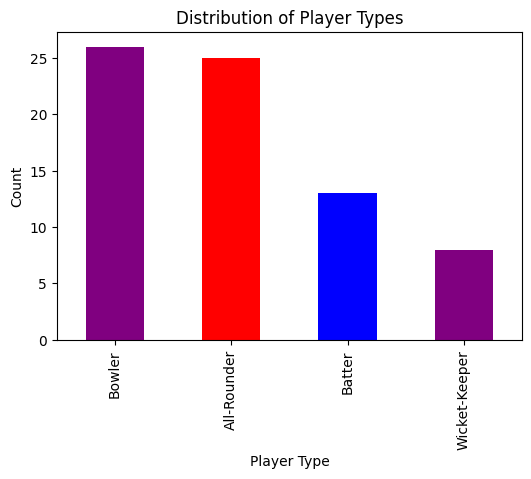

In [25]:
plt.figure(figsize=(6, 4))
type_count.plot(kind='bar', color=['purple', 'red', 'blue'])
plt.title('Distribution of Player Types')
plt.xlabel('Player Type')
plt.ylabel('Count')
plt.show()

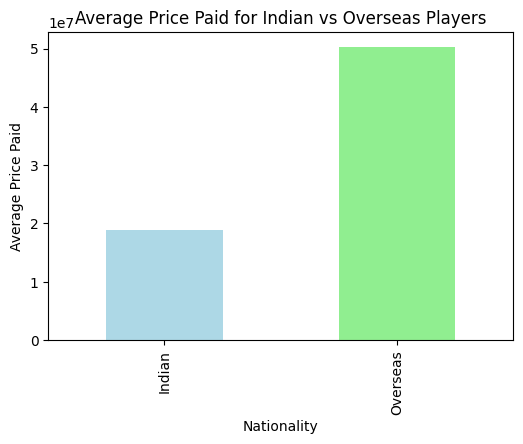

In [26]:
avg_price_nationality.plot(kind='bar', color=['lightblue', 'lightgreen'], figsize=(6, 4))
plt.title('Average Price Paid for Indian vs Overseas Players')
plt.xlabel('Nationality')
plt.ylabel('Average Price Paid')
plt.show()

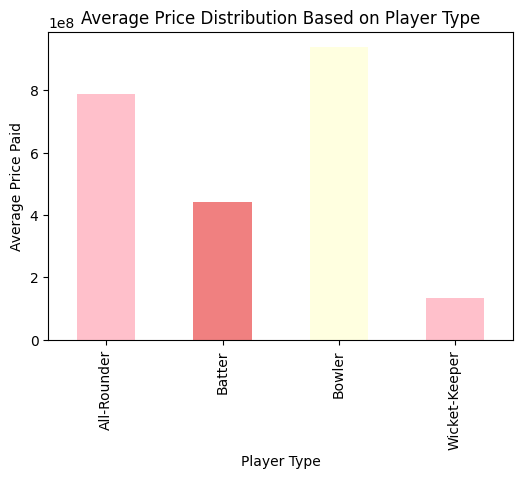

In [27]:
# Analysis 6: Price Distribution Based on Player Type
price_by_type.plot(kind='bar', color=['pink', 'lightcoral', 'lightyellow'], figsize=(6, 4))
plt.title('Average Price Distribution Based on Player Type')
plt.xlabel('Player Type')
plt.ylabel('Average Price Paid')
plt.show()